In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('/workspaces/D2I-Jupyter-Notebook-Tools/ml-data science tutorials/data/diabetes.csv')

features = ['Pregnancies',
            'Glucose', 
            'BloodPressure',
            'SkinThickness',
            'Insulin',	
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
X = df[features]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

lr = LogisticRegression(random_state=1)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[117,   9],
       [ 33,  33]])

Text(0.5, 427.9555555555555, 'Predicted label')

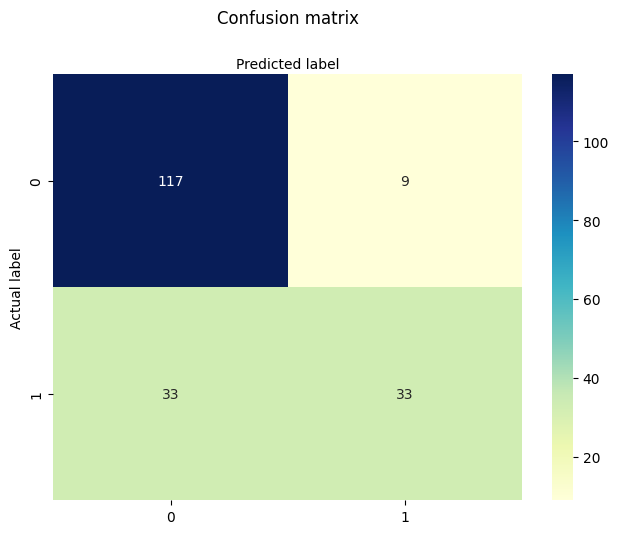

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [24]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
print(output_report)
print(output_report['accuracy'])

{'without diabetes': {'precision': 0.78, 'recall': 0.9285714285714286, 'f1-score': 0.8478260869565217, 'support': 126}, 'with diabetes': {'precision': 0.7857142857142857, 'recall': 0.5, 'f1-score': 0.6111111111111112, 'support': 66}, 'accuracy': 0.78125, 'macro avg': {'precision': 0.7828571428571429, 'recall': 0.7142857142857143, 'f1-score': 0.7294685990338164, 'support': 192}, 'weighted avg': {'precision': 0.7819642857142858, 'recall': 0.78125, 'f1-score': 0.7664553140096618, 'support': 192}}
0.78125


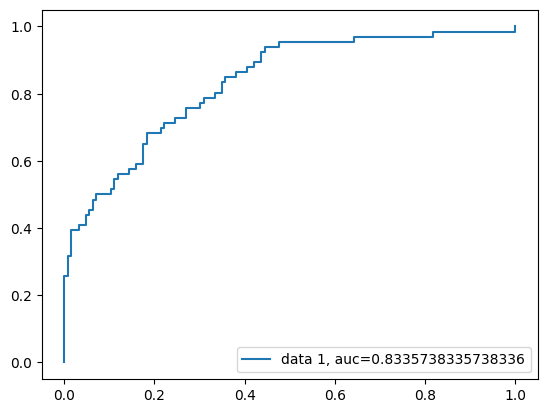

In [13]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [34]:
import itertools

combinations = []

for i in range(1, 9):
    combs_at_i = list(itertools.combinations(features, i))
    combinations.extend(combs_at_i)

print(combinations)

accuracy = 0
best_X = 0

for feature_set in combinations:
    X = df[list(feature_set)]
    y = df.Outcome
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

    lr_iterated = LogisticRegression(random_state=1)

    lr_iterated.fit(X_train, y_train)
    y_pred = lr_iterated.predict(X_test)

    output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

    acc = output_report['accuracy']
    if acc > accuracy:
        accuracy = acc
        best_X = list(feature_set)

print(best_X)

[('Pregnancies',), ('Glucose',), ('BloodPressure',), ('SkinThickness',), ('Insulin',), ('BMI',), ('DiabetesPedigreeFunction',), ('Age',), ('Pregnancies', 'Glucose'), ('Pregnancies', 'BloodPressure'), ('Pregnancies', 'SkinThickness'), ('Pregnancies', 'Insulin'), ('Pregnancies', 'BMI'), ('Pregnancies', 'DiabetesPedigreeFunction'), ('Pregnancies', 'Age'), ('Glucose', 'BloodPressure'), ('Glucose', 'SkinThickness'), ('Glucose', 'Insulin'), ('Glucose', 'BMI'), ('Glucose', 'DiabetesPedigreeFunction'), ('Glucose', 'Age'), ('BloodPressure', 'SkinThickness'), ('BloodPressure', 'Insulin'), ('BloodPressure', 'BMI'), ('BloodPressure', 'DiabetesPedigreeFunction'), ('BloodPressure', 'Age'), ('SkinThickness', 'Insulin'), ('SkinThickness', 'BMI'), ('SkinThickness', 'DiabetesPedigreeFunction'), ('SkinThickness', 'Age'), ('Insulin', 'BMI'), ('Insulin', 'DiabetesPedigreeFunction'), ('Insulin', 'Age'), ('BMI', 'DiabetesPedigreeFunction'), ('BMI', 'Age'), ('DiabetesPedigreeFunction', 'Age'), ('Pregnancies',

/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode